# COVID19 California Data + Facebook Prophet





In [1]:
import pandas as pd
from fbprophet import Prophet 
df = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/ca_train.csv')
df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,California,US,36.1162,-119.6816,2020-01-22,0.0,0.0
1,2,California,US,36.1162,-119.6816,2020-01-23,0.0,0.0
2,3,California,US,36.1162,-119.6816,2020-01-24,0.0,0.0
3,4,California,US,36.1162,-119.6816,2020-01-25,0.0,0.0
4,5,California,US,36.1162,-119.6816,2020-01-26,0.0,0.0


## STEP 1: Split into DS & Y
### We're starting with `ConfirmedCases` as Y

In [0]:
sm = df[['Date', 'ConfirmedCases']]
sm.columns = ['ds','y']

In [7]:
m = Prophet()
m.fit(sm)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
417,2021-03-14
418,2021-03-15
419,2021-03-16
420,2021-03-17
421,2021-03-18


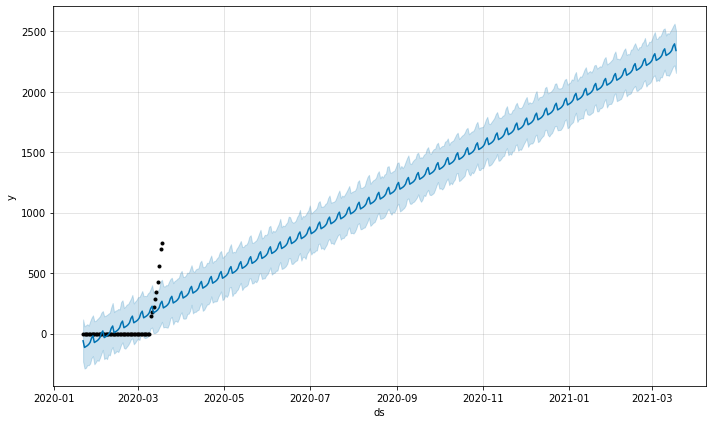

In [17]:
forecast = m.predict(future)
fig1 = m.plot(forecast)

### * NOTE: Wow that is ridiculously unhelpful. Clearly 365 was too much. Turning it into a function for more rapid testing

In [0]:
def get_prof_preds_for(df, n):
  m = Prophet()
  m.fit(df)
  future = m.make_future_dataframe(periods=n)
  forecast = m.predict(future)
  fig1 = m.plot(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


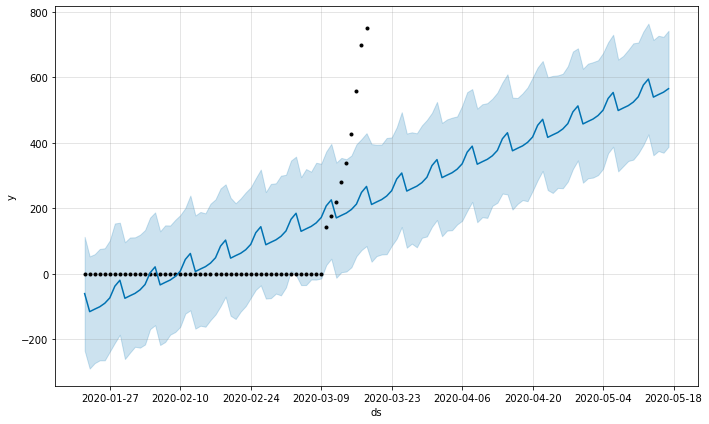

In [19]:
get_prof_preds_for(sm, 60)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


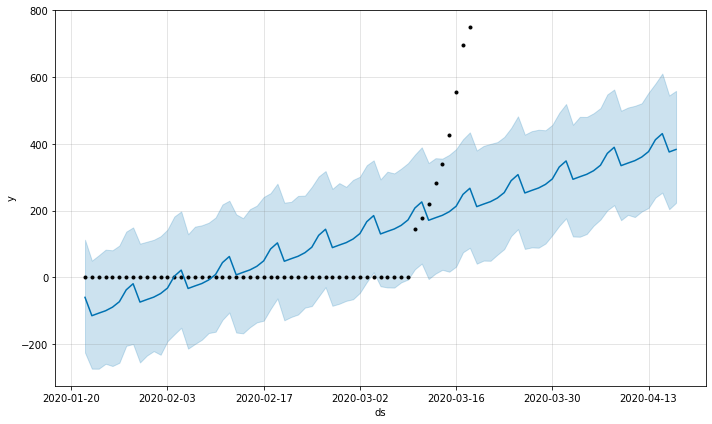

In [20]:
get_prof_preds_for(sm, 30)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


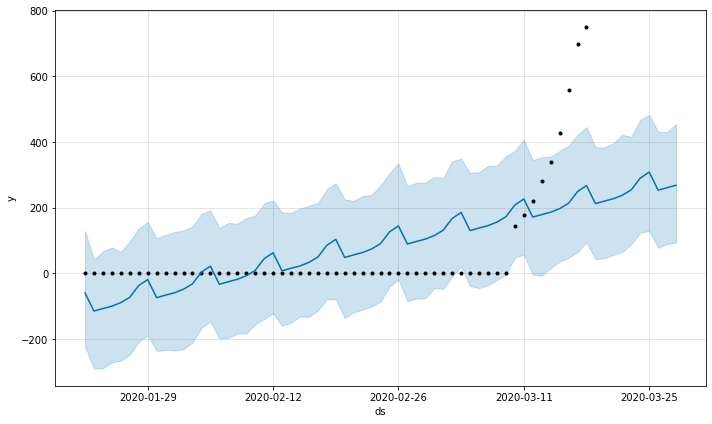

In [21]:
get_prof_preds_for(sm, 10)

#### Trimming the training data

In [50]:
sm

,ds,y
0,2020-01-22,0.0
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
5,2020-01-27,0.0
6,2020-01-28,0.0
7,2020-01-29,0.0
8,2020-01-30,0.0
9,2020-01-31,0.0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


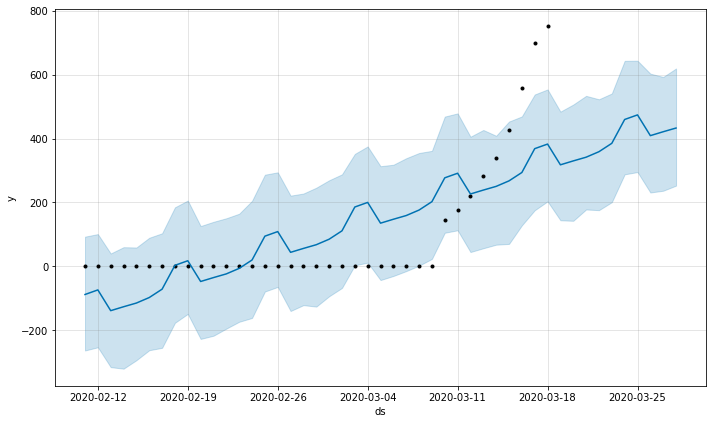

In [25]:
get_prof_preds_for(sm[20:],10)

In [0]:
def get_prof_preds_for(df, n):
  m = Prophet(daily_seasonality=True)
  m.fit(df)
  future = m.make_future_dataframe(periods=n)
  forecast = m.predict(future)
  fig1 = m.plot(forecast)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


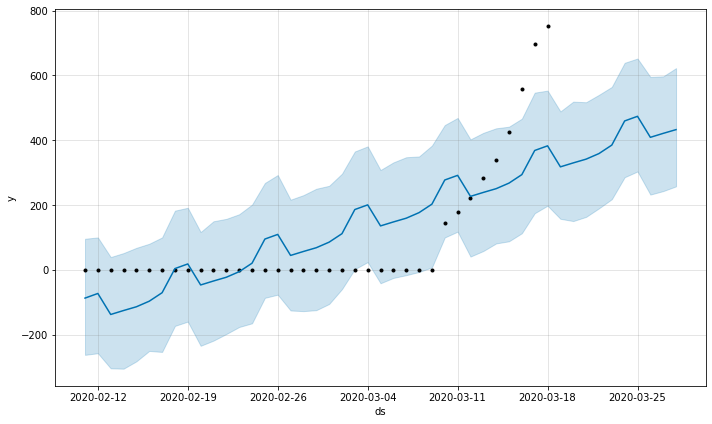

In [30]:
get_prof_preds_for(sm[20:],10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.


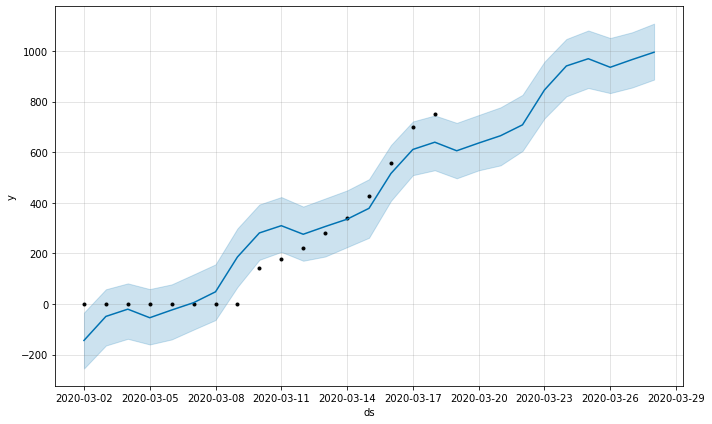

In [33]:
get_prof_preds_for(sm[40:],10)

#### OK looks like we are getting somewhere

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.


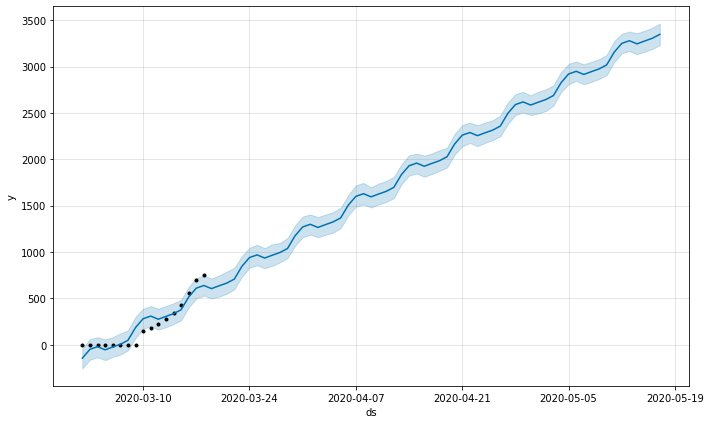

In [35]:
get_prof_preds_for(sm[40:],60)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


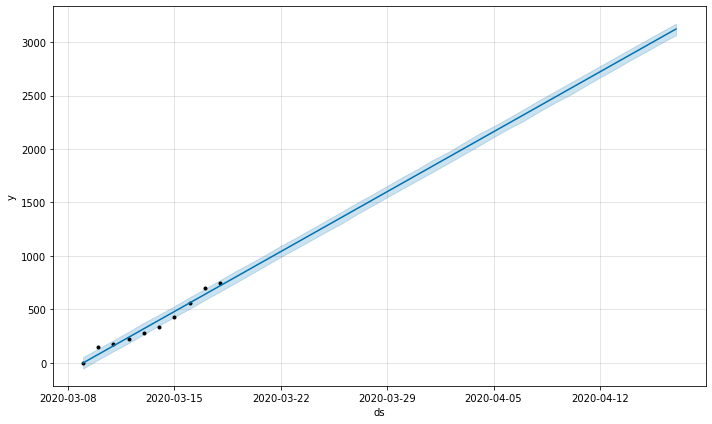

In [39]:
get_prof_preds_for(sm[47:],30]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


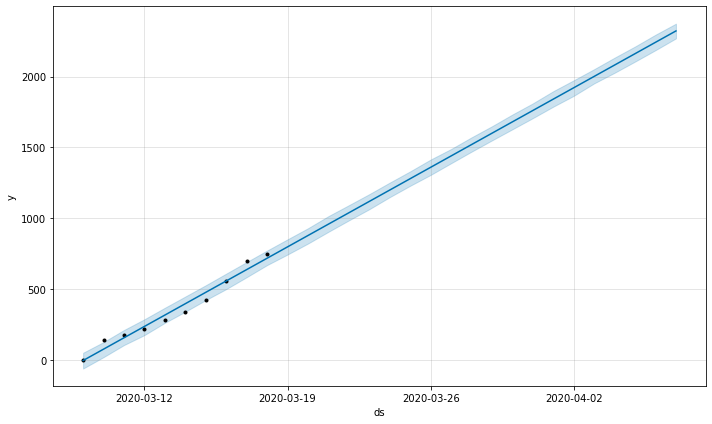

In [44]:
get_prof_preds_for(sm[47:],20)

# STEP 1B: Try with Fatalities 

In [0]:
sm = df[['Date', 'Fatalities']]
sm.columns = ['ds','y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


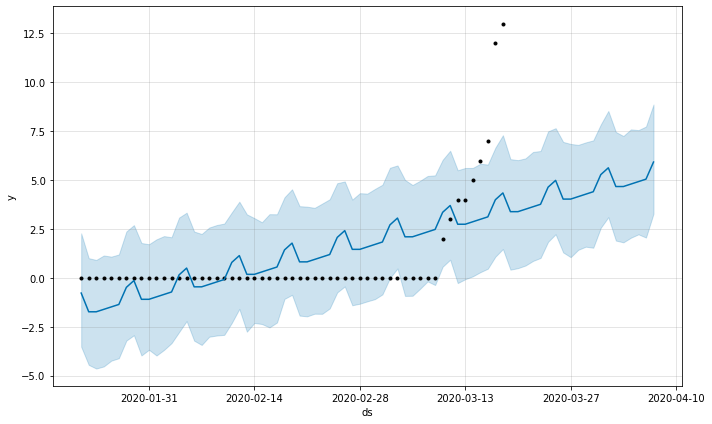

In [46]:
get_prof_preds_for(sm, 20)

In [47]:
sm

,ds,y
0,2020-01-22,0.0
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
5,2020-01-27,0.0
6,2020-01-28,0.0
7,2020-01-29,0.0
8,2020-01-30,0.0
9,2020-01-31,0.0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


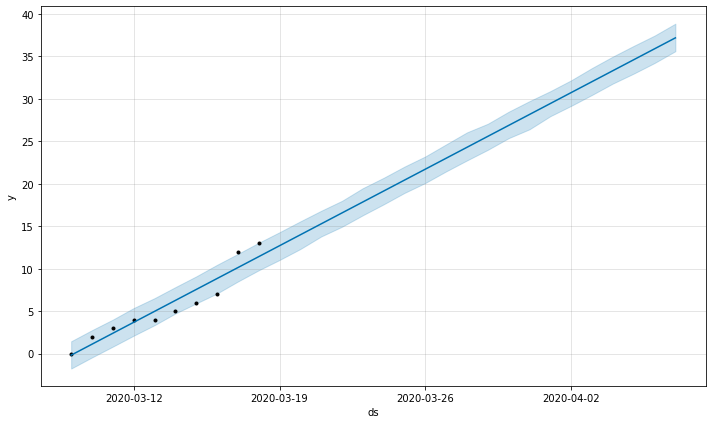

In [48]:
get_prof_preds_for(sm[47:], 20)